# Assignment 4

## Sherwyn Braganza | Isaac McClanahan

**1) Use the make_moons dataset from scikit-learn with 500 samples, noise = 0.1 to make an artificial data-set.  This is a 2 class data-set.**

This is some text thats gonna explain the qurstion

In [15]:
from sklearn import datasets
import matplotlib.pyplot as plt

# picking out random samples with noise factor of 0.1
features, targets = datasets.make_moons(n_samples=500, shuffle=True, noise=0.1, random_state=8)

**2) Split this into training and validation data (no test data necessary here.**

In [16]:
x_train, y_train = features[0:400], targets[0:400]
x_val, y_val = features[400:], targets[400:]

xMin = features[:, 0].min()
xMax = features[:, 0].max()
yMin = features[:, 1].min()
yMax = features[:, 1].max()

**3) Plot both the training and validation datasets.**

/var/folders/m2/6gn8k9tn0rz56ryvkbgdrwsr0000gn/T/ipykernel_28552/3112608867.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


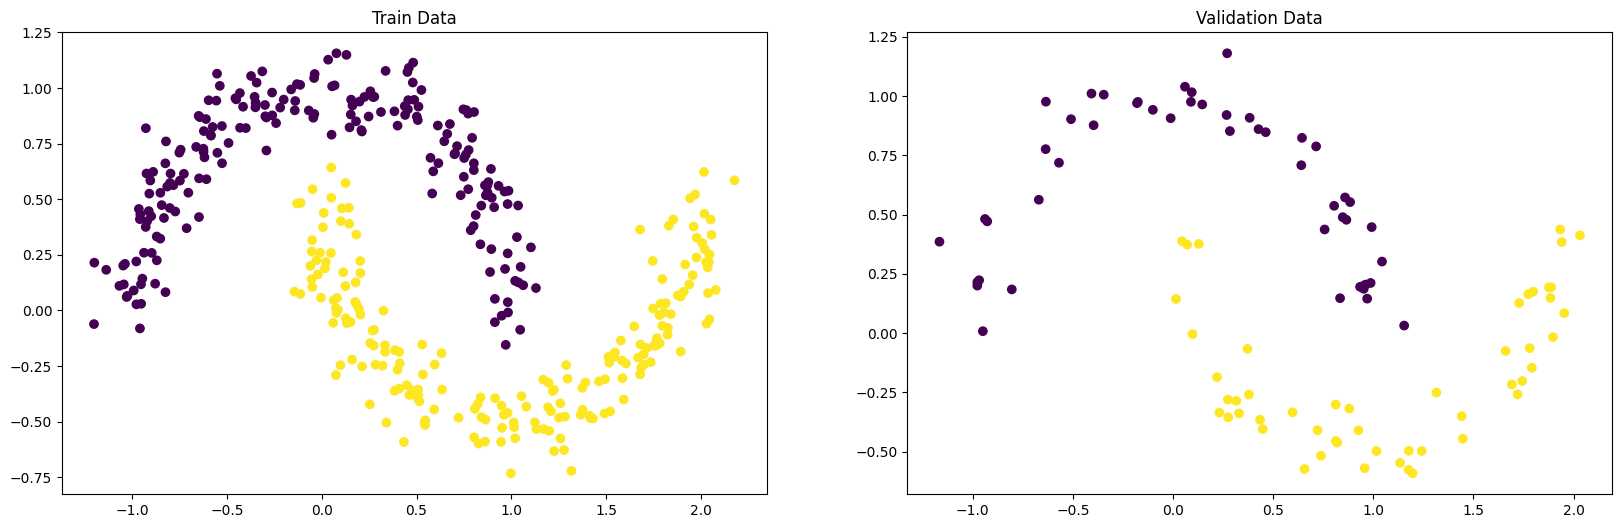

In [17]:
fig, axs = plt.subplots(1,2)
axs[0].scatter(x_train[:,0], x_train[:,1], c=y_train)
axs[0].set_title('Train Data')
axs[1].scatter(x_val[:,0], x_val[:,1], c=y_val)
axs[1].set_title('Validation Data')
fig.set_figwidth(20)
fig.set_figheight(6)
fig.show()

**4) Implement a neural network model (that has reasonable performance) using the Sequential API.**

In [18]:
from tensorflow import keras
from tensorflow.keras import layers

model_sequential = keras.Sequential(name="my_example_model")
model_sequential.add(layers.Dense(64, activation="relu", name="my_first_layer"))
model_sequential.add(layers.Dense(32, activation="tanh", name="my_second_layer"))
model_sequential.add(layers.Dense(1, activation="sigmoid", name="my_last_layer"))
model_sequential.build(input_shape=(None, 2))
model_sequential.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
model_sequential.fit(x_train, y_train, epochs=100, batch_size=50, validation_data=(x_val, y_val))

Epoch 1/100


2022-11-05 10:01:43.246236: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 1s 38ms/step - loss: 0.6071 - accuracy: 0.7450 - val_loss: 0.5385 - val_accuracy: 0.8000
Epoch 2/100
5/8 [=================>............] - ETA: 0s - loss: 0.5106 - accuracy: 0.8000

2022-11-05 10:01:43.713902: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 0s 15ms/step - loss: 0.5021 - accuracy: 0.8050 - val_loss: 0.4670 - val_accuracy: 0.8000
Epoch 3/100
8/8 [==============================] - 0s 20ms/step - loss: 0.4400 - accuracy: 0.8200 - val_loss: 0.4150 - val_accuracy: 0.8000
Epoch 4/100
8/8 [==============================] - 0s 12ms/step - loss: 0.3962 - accuracy: 0.8300 - val_loss: 0.3763 - val_accuracy: 0.8300
Epoch 5/100
8/8 [==============================] - 0s 12ms/step - loss: 0.3618 - accuracy: 0.8425 - val_loss: 0.3437 - val_accuracy: 0.8600
Epoch 6/100
8/8 [==============================] - 0s 12ms/step - loss: 0.3361 - accuracy: 0.8550 - val_loss: 0.3195 - val_accuracy: 0.8600
Epoch 7/100
8/8 [==============================] - 0s 11ms/step - loss: 0.3147 - accuracy: 0.8700 - val_loss: 0.2991 - val_accuracy: 0.8600
Epoch 8/100
8/8 [==============================] - 0s 11ms/step - loss: 0.2976 - accuracy: 0.8725 - val_loss: 0.2807 - val_accuracy: 0.8700
Epoch 9/100
8/8 [===============

8/8 [==============================] - 0s 11ms/step - loss: 0.0783 - accuracy: 0.9750 - val_loss: 0.0742 - val_accuracy: 0.9900
Epoch 61/100
8/8 [==============================] - 0s 11ms/step - loss: 0.0774 - accuracy: 0.9700 - val_loss: 0.0733 - val_accuracy: 0.9900
Epoch 62/100
8/8 [==============================] - 0s 11ms/step - loss: 0.0725 - accuracy: 0.9750 - val_loss: 0.0657 - val_accuracy: 0.9900
Epoch 63/100
8/8 [==============================] - 0s 12ms/step - loss: 0.0675 - accuracy: 0.9800 - val_loss: 0.0621 - val_accuracy: 0.9900
Epoch 64/100
8/8 [==============================] - 0s 12ms/step - loss: 0.0644 - accuracy: 0.9800 - val_loss: 0.0594 - val_accuracy: 0.9900
Epoch 65/100
8/8 [==============================] - 0s 14ms/step - loss: 0.0622 - accuracy: 0.9800 - val_loss: 0.0552 - val_accuracy: 0.9900
Epoch 66/100
8/8 [==============================] - 0s 11ms/step - loss: 0.0597 - accuracy: 0.9825 - val_loss: 0.0516 - val_accuracy: 0.9900
Epoch 67/100
8/8 [========

**5) Plot the loss (of both training and validation) over the training epochs.**

/var/folders/m2/6gn8k9tn0rz56ryvkbgdrwsr0000gn/T/ipykernel_28552/2761146284.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


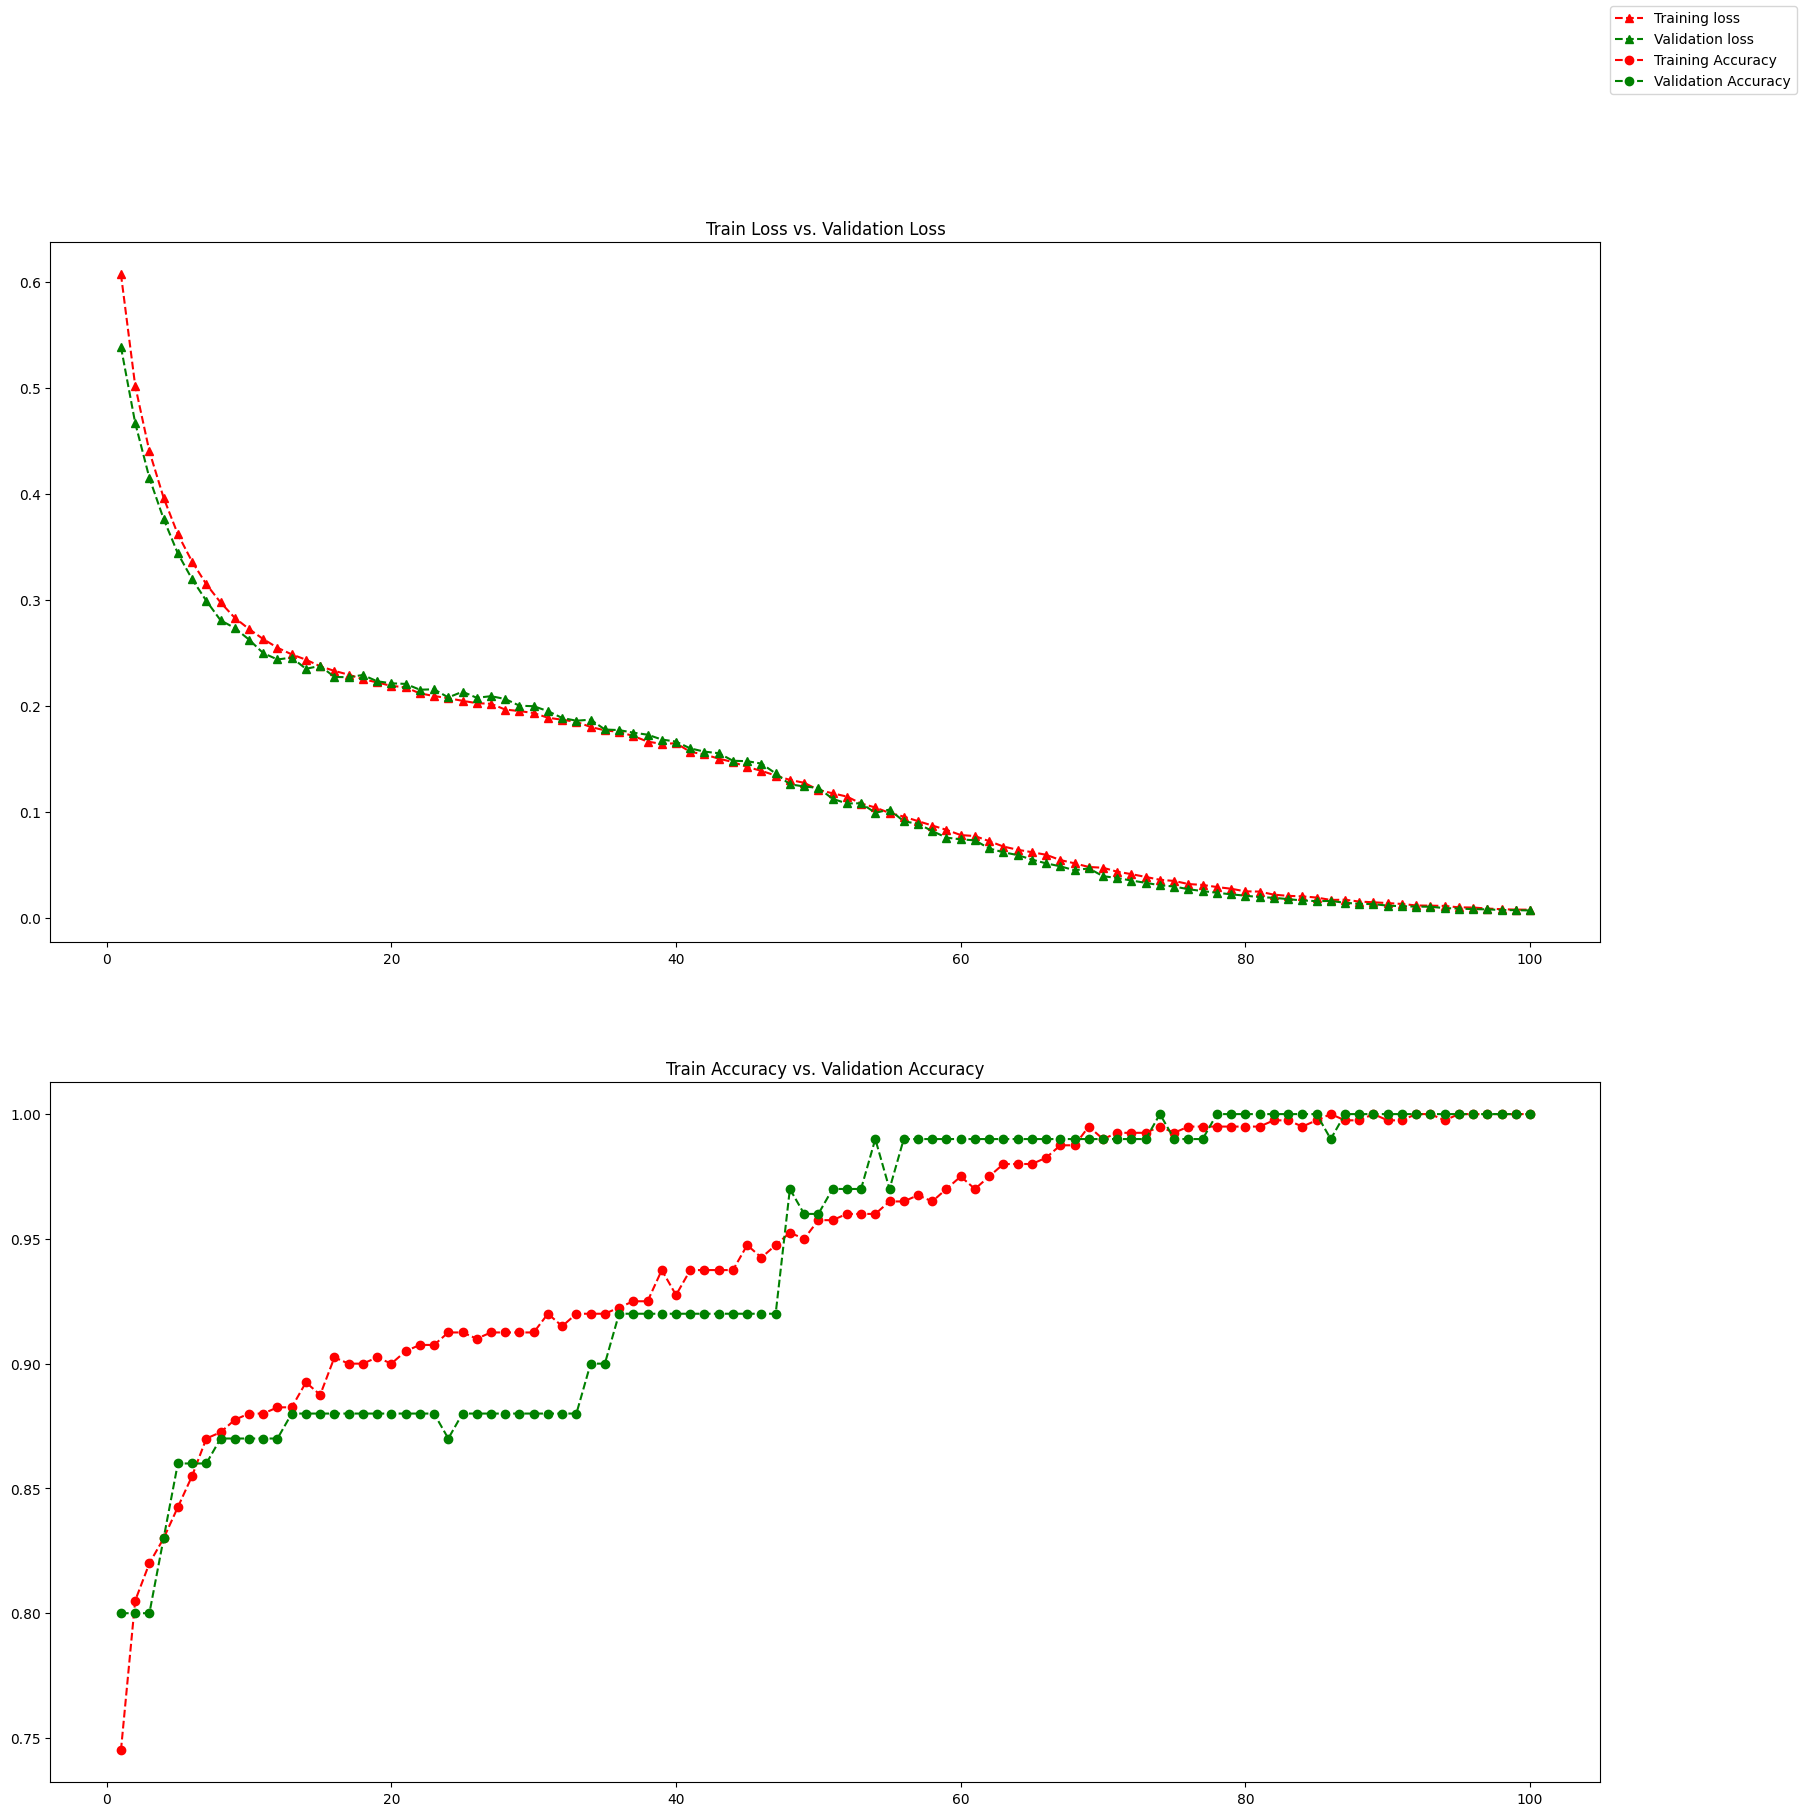

In [19]:
def plotMetrics(history:dict)->None:
    epochs = range(1, len(history['loss']) + 1)

    fig, axs = plt.subplots(2)
    axs[0].plot(epochs, history['loss'],
                label="Training loss", color = 'red', linestyle='--', marker = '^')
    axs[0].plot(epochs, history['val_loss'],
                label="Validation loss", color = 'green', linestyle='--', marker = '^')
    axs[0].set_title('Train Loss vs. Validation Loss')
    axs[1].plot(epochs, history['accuracy'],
                label="Training Accuracy", color = 'red', linestyle='--', marker = 'o')
    axs[1].plot(epochs, history['val_accuracy'],
                label="Validation Accuracy", color = 'green', linestyle='--', marker = 'o')
    axs[1].set_title('Train Accuracy vs. Validation Accuracy')
    fig.set_figwidth(20)
    fig.set_figheight(20)
    fig.legend()
    fig.show()
    
sequential_history = model_sequential.history.history
plotMetrics(sequential_history)

**6) Plot the data _and_ the decision regions together on a new plot.**

16/16 [==============================] - 0s 3ms/step


2022-11-05 10:01:55.009862: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


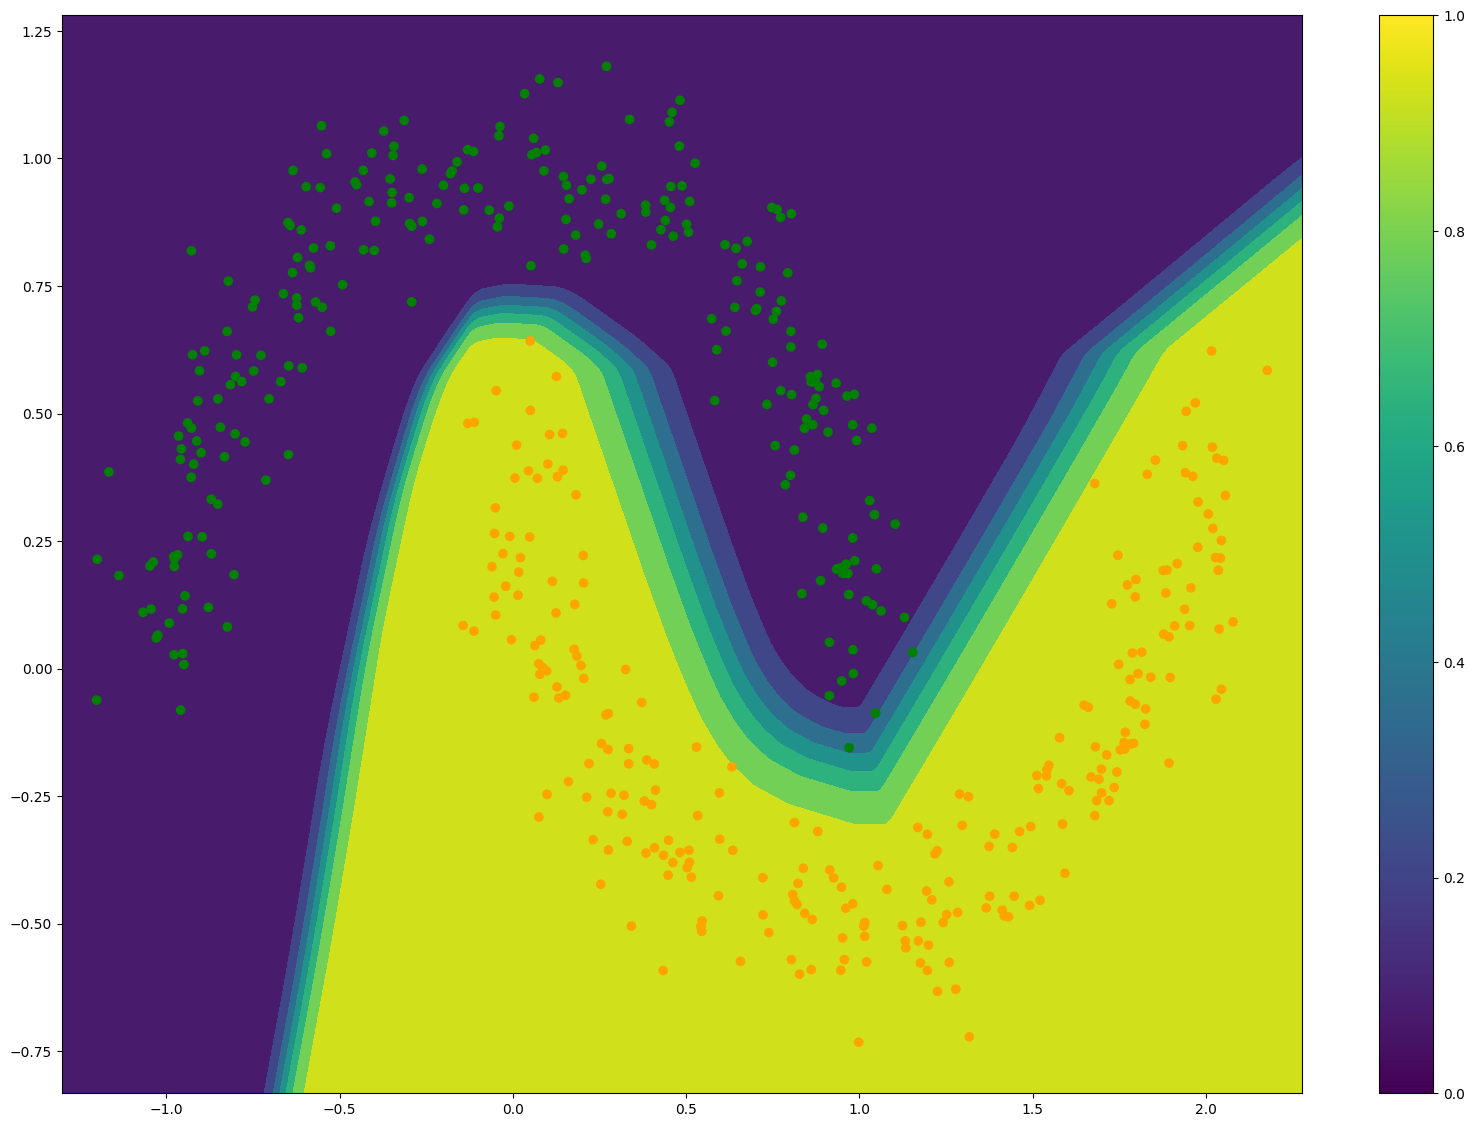

In [20]:
import numpy as np

def addColor( values ):
    colors = []
    for i in values:
        if i < 0.5:
            colors.append("green")
        else:
            colors.append("orange")
    return colors


res = 500

plt.rcParams["figure.figsize"] = (20, 14)

# Make meshgrid of xy points
xx, yy = np.meshgrid(np.linspace(xMin - 0.1, xMax + 0.1, res), np.linspace(yMin - 0.1, yMax + 0.1, res), indexing="xy")
xy = np.dstack((xx, yy))

# Make meshgrid of equal size containing predictions
zz = np.ndarray((res, res))
for i in range(0, res):
    zz[i] = model_sequential(xy[i])[:, 0]

# Graph decision regions
plt.contourf(xx, yy, zz, levels=8)

# predictions_sequential = np.round(model_sequential.predict(x_val))
xx, yy= np.meshgrid(features[:,0], features[:,1], sparse=True)
plt.scatter(xx, yy, c=addColor( model_sequential.predict(features) ) )
plt.colorbar()

plt.show()

**7) Repeat this using the functional API.**

In [ ]:
inputs = keras.Input(shape=(2,), name='functional_input')
feature = layers.Dense(64, activation="relu")(inputs) 
feature = layers.Dense(32, activation='tanh')(feature)
outputs = layers.Dense(1, activation="sigmoid")(feature)
model_functional = keras.Model(inputs=inputs, outputs=outputs)
model_functional.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
model_functional.fit(x_train, y_train, epochs=100, batch_size=50, validation_data=(x_val, y_val))
functional_history = model_functional.history.history
plotMetrics(functional_history)

Epoch 1/100


2022-11-05 10:01:55.671225: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 1s 38ms/step - loss: 0.5706 - accuracy: 0.7850 - val_loss: 0.5142 - val_accuracy: 0.8000
Epoch 2/100
8/8 [==============================] - 0s 11ms/step - loss: 0.4807 - accuracy: 0.8150 - val_loss: 0.4512 - val_accuracy: 0.8000
Epoch 3/100
1/8 [==>...........................] - ETA: 0s - loss: 0.4309 - accuracy: 0.8000

2022-11-05 10:01:56.112820: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 0s 12ms/step - loss: 0.4251 - accuracy: 0.8175 - val_loss: 0.4042 - val_accuracy: 0.8000
Epoch 4/100
8/8 [==============================] - 0s 11ms/step - loss: 0.3844 - accuracy: 0.8375 - val_loss: 0.3694 - val_accuracy: 0.8200
Epoch 5/100
8/8 [==============================] - 0s 11ms/step - loss: 0.3539 - accuracy: 0.8350 - val_loss: 0.3403 - val_accuracy: 0.8300
Epoch 6/100
8/8 [==============================] - 0s 11ms/step - loss: 0.3292 - accuracy: 0.8525 - val_loss: 0.3152 - val_accuracy: 0.8600
Epoch 7/100
8/8 [==============================] - 0s 11ms/step - loss: 0.3102 - accuracy: 0.8650 - val_loss: 0.2972 - val_accuracy: 0.8600
Epoch 8/100
8/8 [==============================] - 0s 11ms/step - loss: 0.2939 - accuracy: 0.8750 - val_loss: 0.2789 - val_accuracy: 0.8700
Epoch 9/100
8/8 [==============================] - 0s 11ms/step - loss: 0.2805 - accuracy: 0.8775 - val_loss: 0.2698 - val_accuracy: 0.8700
Epoch 10/100
8/8 [==============

In [ ]:
plt.rcParams["figure.figsize"] = (20, 14)

# Make meshgrid of xy points
xx, yy = np.meshgrid(np.linspace(xMin - 0.1, xMax + 0.1, res), np.linspace(yMin - 0.1, yMax + 0.1, res), indexing="xy")
xy = np.dstack((xx, yy))

# Make meshgrid of equal size containing predictions
zz = np.ndarray((res, res))
for i in range(0, res):
    zz[i] = model_functional(xy[i])[:, 0]

# Graph decision regions
plt.contourf(xx, yy, zz, levels=8)

# predictions_sequential = np.round(model_sequential.predict(x_val))
xx, yy= np.meshgrid(features[:,0], features[:,1], sparse=True)
plt.scatter(xx, yy, c=addColor( model_functional.predict(features) ) )
plt.colorbar()

plt.show()